<a href="https://colab.research.google.com/github/jayahe/Deep_Learning_using_Keras/blob/master/Classification_model_using_Deep_Learning_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Building a model on fashion mnist data

In [0]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
labelmap=['t_shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle_boot']

In [0]:
print(x_train.shape)
print(len(labelmap))

(60000, 28, 28)
10


In [0]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

the shape of training data:  (60000, 28, 28)
the shape of test data:  (10000, 28, 28)
total no.of outputs:  10
output classes:  [0 1 2 3 4 5 6 7 8 9]


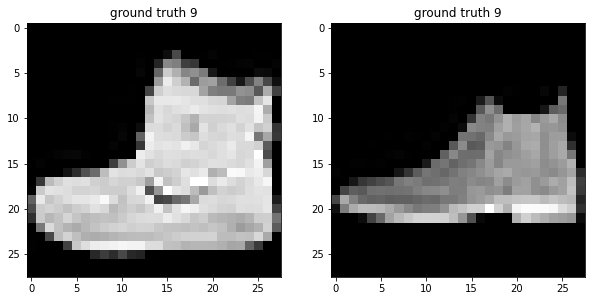

In [0]:
print('the shape of training data: ',x_train.shape)
print('the shape of test data: ',x_test.shape)

classes = np.unique(y_train)
n_classes = len(classes)

print('total no.of outputs: ',n_classes)
print('output classes: ',classes)

plt.figure(figsize=[10,5])

## Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:],cmap='gray')
plt.title('ground truth {}'.format(y_train[0]))

## Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:],cmap='gray')
plt.title('ground truth {}'.format(y_test[0]))

plt.show()

plt.show()

#### Preprocess data

In [0]:
# change from matrix to array of 28x28 to array of dimension 784
print(x_train.shape)
dimdata = np.prod(x_train.shape[1:])
train_data = x_train.reshape(x_train.shape[0],dimdata)
test_data = x_test.reshape(x_test.shape[0],dimdata)

(60000, 28, 28)


In [0]:
print('type of original data: ',train_data.dtype)
# convert data into float
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# scale the data to lie between 0 and 1
train_data /= 255
test_data /= 255

type of original data:  uint8


In [0]:
## Change the labels from integer to categoricl - one hot encoding
train_labels_one_hot_encod = to_categorical(y_train)
test_labels_one_hot_encod = to_categorical(y_test)

## display the original labels and one hot encoded labels
print('The original lables is: ',y_train[0])
print('The one hot ecoded label is: ',train_labels_one_hot_encod[0])

The original lables is:  9
The one hot ecoded label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Training

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu',input_shape = (dimdata,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))


In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Training the data

In [0]:
history = model.fit(train_data, train_labels_one_hot_encod, batch_size=256, epochs=20, verbose=0,
                    validation_data = (test_data, test_labels_one_hot_encod))

### Evaluate the trained model

In [0]:
test_loss, test_acc = model.evaluate(test_data, test_labels_one_hot_encod)
print('Evaluation result on test data Loss: {} and accuracy: {}'.format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.4878 - accuracy: 0.8766
Evaluation result on test data Loss: 0.4877869784832001 and accuracy: 0.8766000270843506


### Check for overfitting

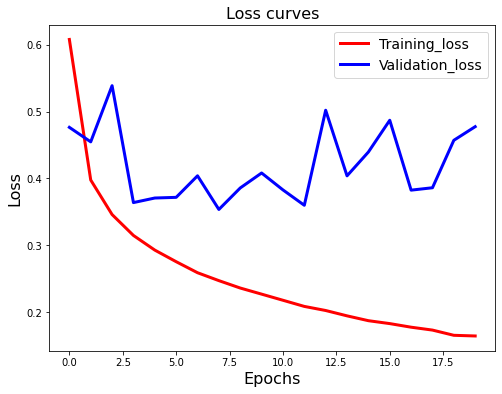

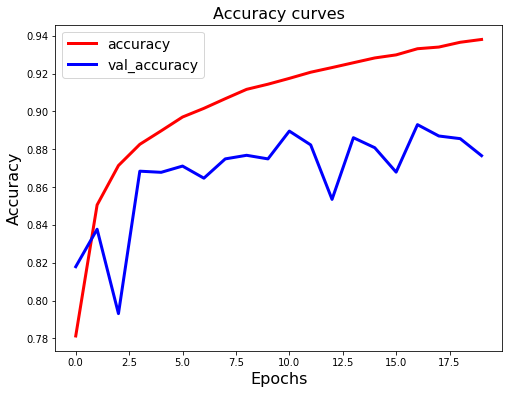

In [0]:
## Plot the loss curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training_loss', 'Validation_loss'],fontsize=14)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss curves',fontsize = 16)

## Plot the accuracy curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['accuracy','val_accuracy'],fontsize=14)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves',fontsize=16)

plt.show()


From the above two graphs we can notice that the model is clearly overfitting, hence add regularised parameter to avoid overfitting

### Add Regularization and rerun the entire model once again

In [0]:
from tensorflow.keras.layers import Dropout

model_reg = Sequential()
model_reg.add(Dense(512, activation='relu',input_shape = (dimdata,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(n_classes, activation='softmax'))

model_reg.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model_reg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_reg = model_reg.fit(train_data, train_labels_one_hot_encod, batch_size=256, epochs=20, verbose=1,
                    validation_data = (test_data, test_labels_one_hot_encod),learni)

Epoch 1/20
235/235 [==============================] - 6s 28ms/step - loss: 0.6773 - accuracy: 0.7544 - val_loss: 0.4671 - val_accuracy: 0.8293
Epoch 2/20
235/235 [==============================] - 6s 27ms/step - loss: 0.4703 - accuracy: 0.8289 - val_loss: 0.4436 - val_accuracy: 0.8383
Epoch 3/20
235/235 [==============================] - 6s 28ms/step - loss: 0.4264 - accuracy: 0.8462 - val_loss: 0.4140 - val_accuracy: 0.8467
Epoch 4/20
235/235 [==============================] - 6s 27ms/step - loss: 0.4005 - accuracy: 0.8561 - val_loss: 0.3929 - val_accuracy: 0.8561
Epoch 5/20
235/235 [==============================] - 6s 27ms/step - loss: 0.3877 - accuracy: 0.8603 - val_loss: 0.3784 - val_accuracy: 0.8630
Epoch 6/20
235/235 [==============================] - 7s 28ms/step - loss: 0.3749 - accuracy: 0.8644 - val_loss: 0.3804 - val_accuracy: 0.8623
Epoch 7/20
235/235 [==============================] - 6s 27ms/step - loss: 0.3645 - accuracy: 0.8685 - val_loss: 0.3803 - val_accuracy: 0.8648

In [0]:
test_reg_loss, test_reg_acc = model_reg.evaluate(test_data, test_labels_one_hot_encod)
print('Evaluation result on test data Loss: {} and accuracy: {}'.format(test_reg_loss, test_reg_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.3952 - accuracy: 0.8778
Evaluation result on test data Loss: 0.3952161371707916 and accuracy: 0.8777999877929688


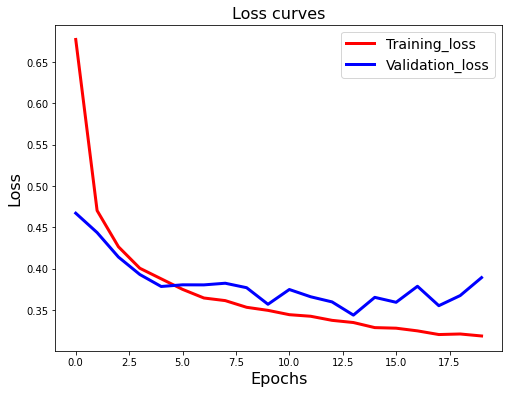

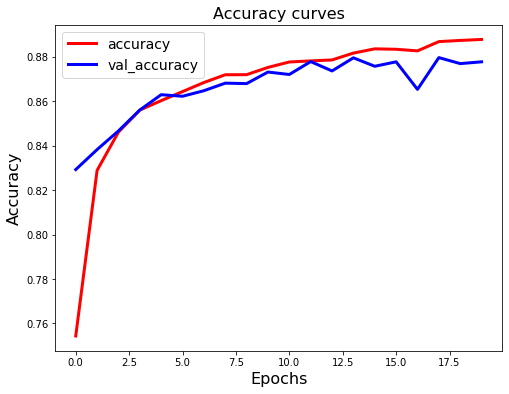

In [0]:
## Plot the loss curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training_loss', 'Validation_loss'],fontsize=14)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss curves',fontsize = 16)

## Plot the accuracy curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['accuracy','val_accuracy'],fontsize=14)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves',fontsize=16)

plt.show()


### Inference on a single image

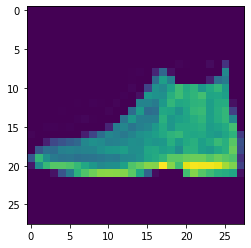

In [0]:
testimage = x_test[0,:,:]
plt.imshow(testimage)

#### Getting the predicted class

In [0]:
label = model_reg.predict_classes(test_data[[0],:])[0]
print('Label: {}, item: {}'.format(label, labelmap[label]))

Label: 9, item: ankle_boot


In [0]:
## Predict the probability of each class
prob = model_reg.predict(test_data[:,:])
labelProb = prob[0][label]
print('Probability : {:.3f}'.format(labelProb))

Probability : 0.952


In [0]:
y_train[3]


3

In [0]:
label_3 = model_reg.predict_classes(test_data[[3],:])[0]
print('Label: {}, item: {}'.format(label_3, labelmap[label_3]))

Label: 1, item: trouser


In [0]:
prob[0][3]
print('Probability : {:.3f}'.format(prob[0][3]))

Probability : 0.000


In [0]:
model_reg.predict_classes(test_data[[1],:])

array([2])